# Concrete Porosity

# Extreme Gradient Boost (XGBoost)

# Explainable AI - Shap values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'Data.xlsx'
data = pd.read_excel(filename)
data.head()

,WB,Binder,FlyAsh,Slag,Superplasticizer,Aggregate,Curing,CuringDays,Porosity,Strength,Training
0,0.4,300,0.0,0.0,0.0,1.6,air,28,9.58,44.3,True
1,0.4,350,0.0,0.0,0.0,1.6,air,28,11.08,45.2,True
2,0.4,400,0.0,0.0,0.0,1.6,air,28,11.27,45.5,True
3,0.5,300,0.0,0.0,0.0,1.6,air,28,10.22,39.1,False
4,0.5,350,0.0,0.0,0.0,1.6,air,28,10.30,42.1,True


In [3]:
predictornames = ['WB','Binder','FlyAsh','Slag','Superplasticizer','Aggregate','Curing','CuringDays']
X = data[predictornames]
X.head()

,WB,Binder,FlyAsh,Slag,Superplasticizer,Aggregate,Curing,CuringDays
0,0.4,300,0.0,0.0,0.0,1.6,air,28
1,0.4,350,0.0,0.0,0.0,1.6,air,28
2,0.4,400,0.0,0.0,0.0,1.6,air,28
3,0.5,300,0.0,0.0,0.0,1.6,air,28
4,0.5,350,0.0,0.0,0.0,1.6,air,28


In [4]:
categories_nums = {"Curing": {"air": 1, "water": 2}}
X.replace(categories_nums, inplace=True)
X.head()

C:\Users\Jason\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,WB,Binder,FlyAsh,Slag,Superplasticizer,Aggregate,Curing,CuringDays
0,0.4,300,0.0,0.0,0.0,1.6,1,28
1,0.4,350,0.0,0.0,0.0,1.6,1,28
2,0.4,400,0.0,0.0,0.0,1.6,1,28
3,0.5,300,0.0,0.0,0.0,1.6,1,28
4,0.5,350,0.0,0.0,0.0,1.6,1,28


In [5]:
X.describe()

,WB,Binder,FlyAsh,Slag,Superplasticizer,Aggregate,Curing,CuringDays
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.480012,369.941667,0.150110,0.043661,0.001016,1.708370,1.166667,89.358333
std,0.098494,73.955352,0.176043,0.105977,0.002427,0.287092,0.373457,109.109963
min,0.350000,295.000000,0.000000,0.000000,0.000000,1.193865,1.000000,1.000000
25%,0.396250,325.000000,0.000000,0.000000,0.000000,1.500000,1.000000,28.000000
50%,0.500000,350.000000,0.050000,0.000000,0.000000,1.722124,1.000000,28.000000
75%,0.546379,400.000000,0.300000,0.000000,0.000242,2.000000,1.000000,91.000000
max,0.700000,591.000000,0.670000,0.400000,0.015789,2.000000,2.000000,365.000000


In [6]:
y = data[['Porosity']]

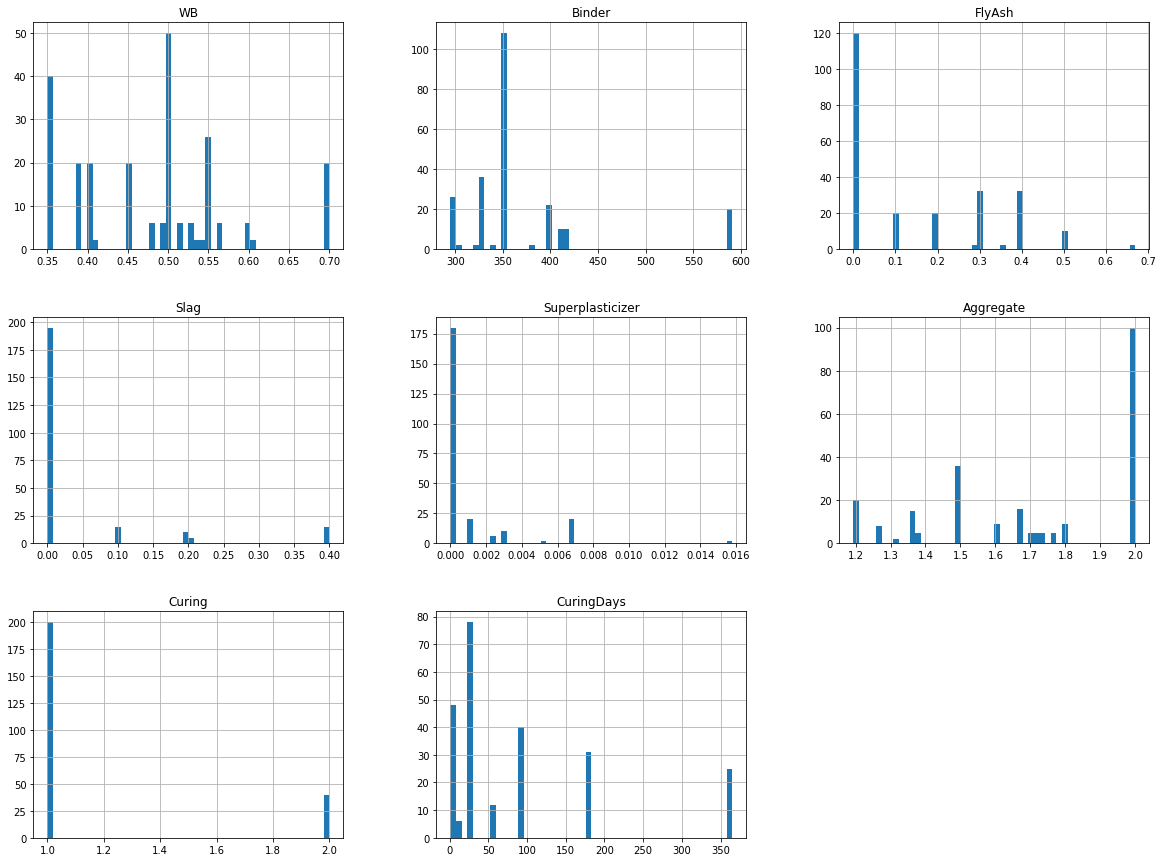

In [7]:
%matplotlib inline
X.hist(bins=50, figsize=(20,15))
plt.show()

## Split Data Set

In [8]:
myTraining = data[['Training']]
idxTrain = myTraining.index[myTraining['Training'] == True].tolist()
print(idxTrain)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 49, 52, 55, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73, 74, 75, 76, 77, 78, 79, 84, 85, 87, 88, 89, 90, 92, 93, 94, 96, 98, 99, 100, 101, 102, 103, 104, 106, 107, 110, 113, 115, 116, 118, 119, 120, 122, 123, 125, 126, 127, 128, 129, 133, 134, 135, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 152, 154, 155, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 190, 191, 192, 194, 195, 196, 199, 200, 201, 203, 204, 205, 206, 207, 209, 210, 211, 212, 214, 215, 216, 218, 219, 220, 221, 222, 223, 225, 227, 228, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239]


In [9]:
X_train = X.loc[idxTrain,:]
X_train.head()

,WB,Binder,FlyAsh,Slag,Superplasticizer,Aggregate,Curing,CuringDays
0,0.4,300,0.0,0.0,0.0,1.6,1,28
1,0.4,350,0.0,0.0,0.0,1.6,1,28
2,0.4,400,0.0,0.0,0.0,1.6,1,28
4,0.5,350,0.0,0.0,0.0,1.6,1,28
5,0.5,400,0.0,0.0,0.0,1.6,1,28


In [10]:
y_train = y.loc[idxTrain,:]
y.head()

,Porosity
0,9.58
1,11.08
2,11.27
3,10.22
4,10.30


In [11]:
idxTest = myTraining.index[myTraining['Training'] == False].tolist()
X_test = X.loc[idxTest,:]
y_test = y.loc[idxTest,:]

In [12]:
np.size(y_train)

180

In [13]:
np.size(y_test)

60

## XGBoost Regression

In [14]:
import xgboost as xgb

In [15]:
import xgboost as xgb

# R2=0.9770, RMSE=0.4313, MAPE=2.97%
XGBoost = xgb.XGBRegressor(max_depth=10, n_estimators=500, learning_rate=0.1, min_child_weight=4, gamma=0.008, reg_alpha=0.01, reg_lambda=2, colsample_bynode=1, random_state=0)

XGBoost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.008, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0.01, reg_lambda=2, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
y_train_xgb = XGBoost.predict(X_train)

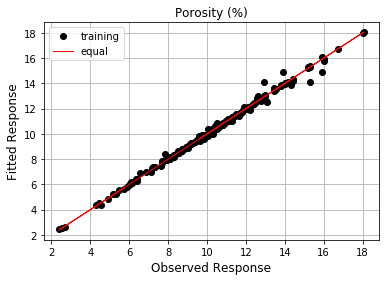

In [17]:
%matplotlib inline
plt.plot(y_train, y_train_xgb, 'ok', label='training')
plt.plot(y_train, y_train,'-r', lw=1, label='equal')
plt.legend(loc='best')
plt.title('Porosity (%)', fontsize=12)
plt.xlabel('Observed Response', fontsize=12)
plt.ylabel('Fitted Response', fontsize=12)
plt.grid(True, axis='both')

In [18]:
from sklearn.metrics import mean_squared_error
xgb_mse_train = mean_squared_error(y_train, y_train_xgb)
xgb_rmse_train = np.sqrt(xgb_mse_train)
print(xgb_rmse_train)

0.2100726296871011


In [19]:
from sklearn.metrics import r2_score
Rsquared_train = r2_score(y_train, y_train_xgb)
print(Rsquared_train)

0.9946794672958931


In [20]:
y_test_xgb = XGBoost.predict(X_test)

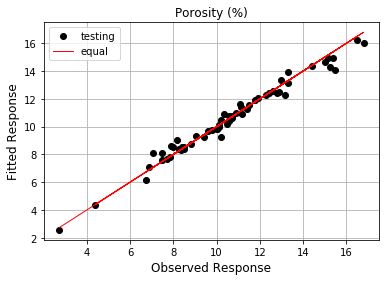

In [21]:
%matplotlib inline
plt.plot(y_test, y_test_xgb, 'ok', label='testing')
plt.plot(y_test, y_test,'-r', lw=1, label='equal')
plt.legend(loc='best')
plt.title('Porosity (%)', fontsize=12)
plt.xlabel('Observed Response', fontsize=12)
plt.ylabel('Fitted Response', fontsize=12)
plt.grid(True, axis='both')

In [22]:
xgb_mse = mean_squared_error(y_test, y_test_xgb)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse)

0.43135949883335245


In [23]:
Rsquared = r2_score(y_test, y_test_xgb)
print(Rsquared)

0.9770177620801587


## Visualize Boosting Trees

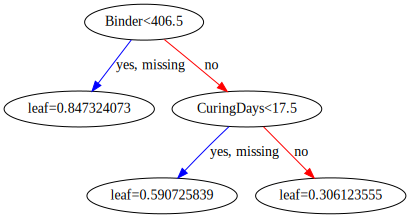

In [24]:
xgb.to_graphviz(XGBoost, num_trees=2)

## Feature Importance

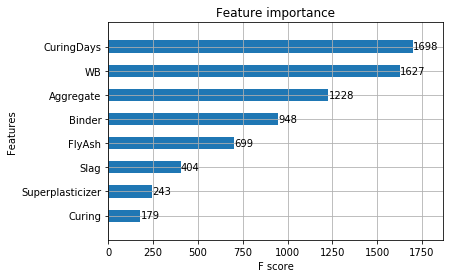

In [25]:
xgb.plot_importance(XGBoost, height = 0.5)

# Shap values

In [26]:
import shap
shap.initjs()

In [27]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(XGBoost)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [28]:
# visualize the first prediction's explanation with a force plot
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [29]:
# visualize all the training set predictions with a force plot
shap.force_plot(explainer.expected_value, shap_values[:,:], X_train.iloc[:,:])

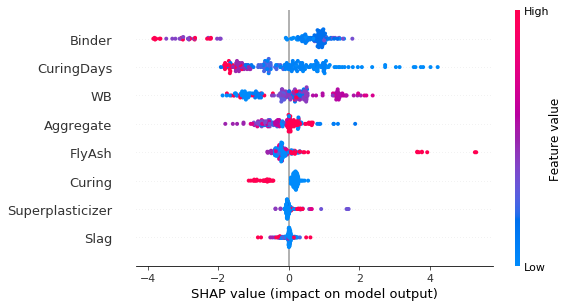

In [30]:
shap.summary_plot(shap_values, X_train)

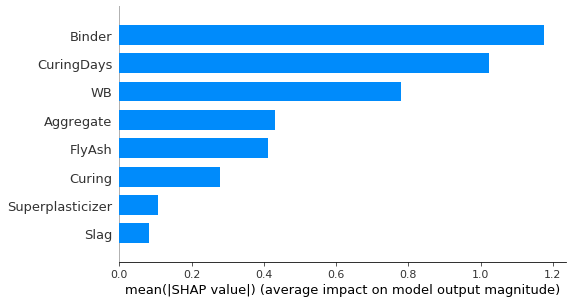

In [31]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [32]:
# To analyze feature interaction
inds = shap.approximate_interactions("CuringDays", shap_values, X_train)
inds

array([2, 5, 1, 3, 0, 4, 6, 7], dtype=int64)

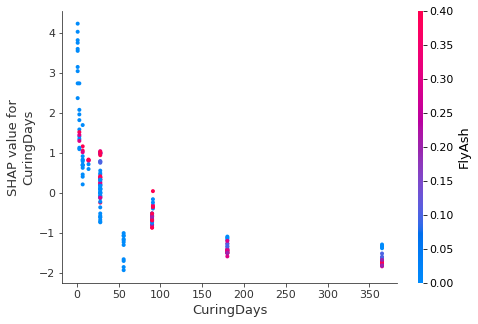

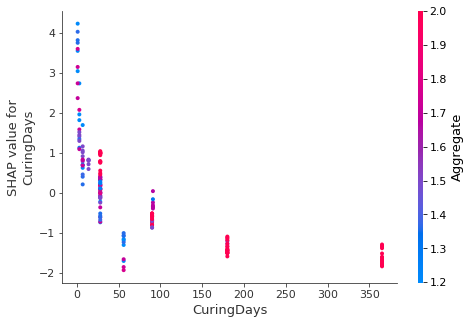

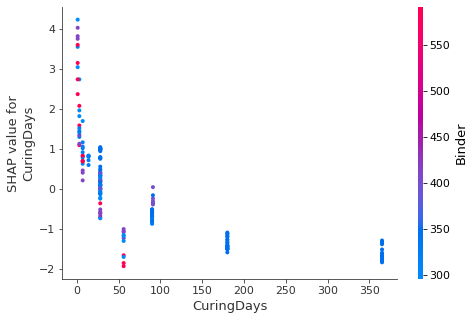

In [33]:
for i in range(3):
    shap.dependence_plot("CuringDays", shap_values, X_train, interaction_index=inds[i])

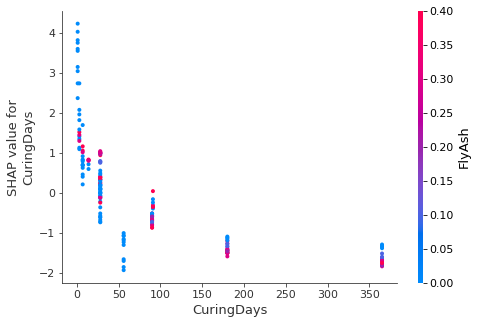

In [34]:
shap.dependence_plot("CuringDays", shap_values, X_train, interaction_index="FlyAsh")

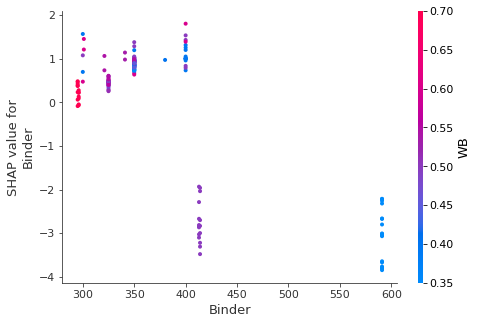

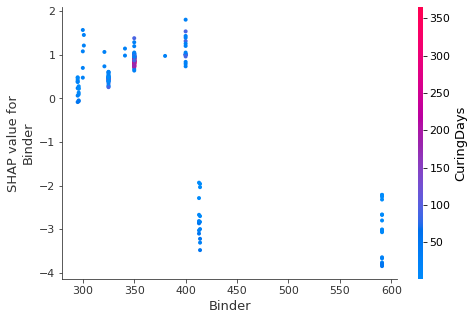

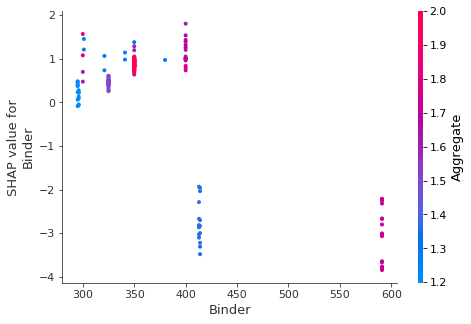

In [35]:
inds2 = shap.approximate_interactions("Binder", shap_values, X_train)
for i in range(3):
    shap.dependence_plot("Binder", shap_values, X_train, interaction_index=inds2[i])

## Shapley Interaction Index

In [36]:
shap_interaction_values = explainer.shap_interaction_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


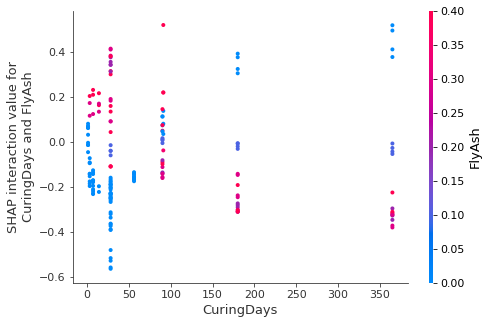

In [37]:
shap.dependence_plot(
    ("CuringDays", "FlyAsh"),
    shap_interaction_values, X_train
)

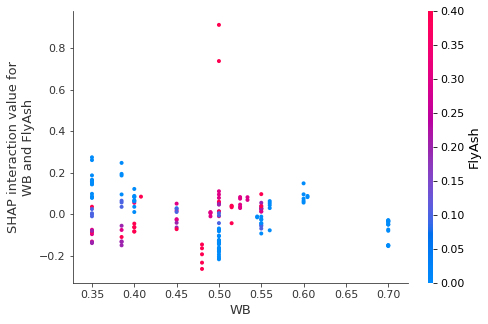

In [38]:
shap.dependence_plot(
    ("WB", "FlyAsh"),
    shap_interaction_values, X_train
)

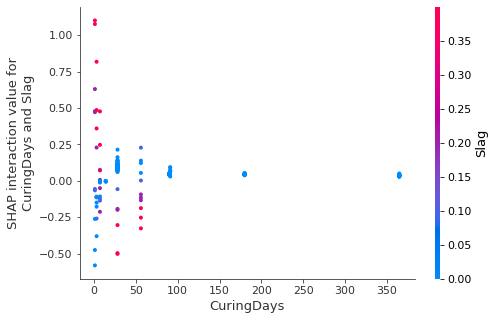

In [39]:
shap.dependence_plot(
    ("CuringDays", "Slag"),
    shap_interaction_values, X_train
)

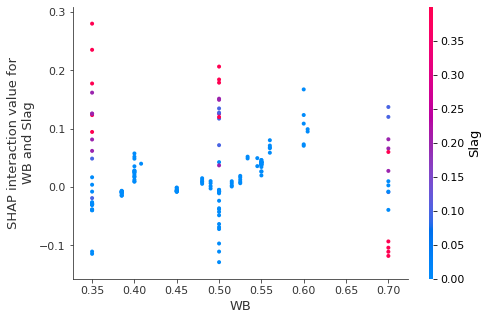

In [40]:
shap.dependence_plot(
    ("WB", "Slag"),
    shap_interaction_values, X_train
)